In [1]:
%pip install numpy pandas matplotlib seaborn sklearn scikit prettytable 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sklearn in c:\python39\lib\site-packages (0.0)



ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

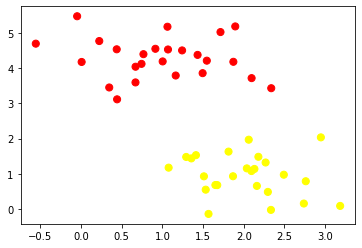

In [3]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plt.show()

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(X, Y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

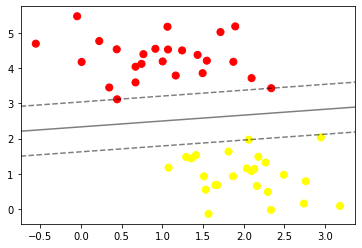

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [7]:
df = pd.read_csv('data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [13]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [14]:
df.shape

(3168, 21)

In [18]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [20]:
# label encoding
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes

In [22]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [28]:
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1.173318,-1.076396,0.606437,1.101545,0.926510,-0.743114,-0.234207,-0.209175,-0.849951,-1.117563,0.364414,1.173318,0.953024,0.574418,0.513160,0.672247,-0.467394,1.368994,1.377332,-1.104873
1,-1.026176,0.319604,-1.586536,-0.847549,-0.930238,0.454942,-0.100088,-0.176133,0.587324,0.564080,-0.916617,-1.026176,-1.279397,0.767680,-1.845252,-0.041583,0.718876,-0.323874,-0.336590,1.527131
2,0.244105,0.335935,-0.733026,-0.159493,1.267345,0.860834,-0.299014,-0.222050,-0.465320,-0.692955,-0.324177,0.244105,-0.365577,0.544784,0.619683,1.858245,-0.467394,0.508915,0.517201,-0.178565
3,0.306890,-1.394338,0.208319,0.605265,-0.502992,-0.952264,-0.228087,-0.211616,-1.088116,-0.968639,0.038164,0.306890,0.859128,-1.105636,-0.431893,-0.760440,0.032088,-0.073293,-0.073864,-0.501535
4,0.081986,-0.158561,-0.355049,-0.088190,0.650384,0.448912,-0.361029,-0.229361,0.066619,-0.381296,-0.516041,0.081986,-0.257772,0.566943,0.619683,-0.094443,-0.467394,-0.509948,-0.501724,-0.634298


In [29]:
from sklearn.metrics import accuracy_score

linear_svc = SVC(kernel='linear', C=1.0)

# fit classifier to training set
linear_svc.fit(X_train, y_train)

# make predictions on test set
y_pred_test = linear_svc.predict(X_test)

accuracy =   accuracy_score(y_test, y_pred_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy))


Model accuracy score with linear kernel and C=1.0 : 0.9732
